After downloading data, we merge the vcf files
# The vcf are downloaded in 1000genomes/vcf_raw/downloaded

In [ ]:
# bcftools concat -f vcf_list.txt -Oz -o ALL_merged.vcf.gz --threads 8
# tabix -p vcf ALL_merged.vcf.gz --threads 8


Expected -a, -f, -m, -D or -d option
^C


In [ ]:
# 1. Setup and Data Loading
from pathlib import Path
import os
from typing import List, Tuple, Dict, Any
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cyvcf2 import VCF # Fast VCF parsing



In [ ]:
# --- CONFIGURATION ---
VCF_FILE = "1000genomes/vcf_raw/downloaded/ALL_merged.vcf.gz" # CHANGE THIS PATH!
# ---------------------

# Initialize VCF Reader
try:
    vcf = VCF(VCF_FILE)
except FileNotFoundError:
    print(f"Error: VCF file not found at {VCF_FILE}. Please update the path.")
    # Exit or use dummy data if necessary for demonstration
    # ...
    # return

# Extract sample IDs (Individuals) and total variant count
SAMPLES = vcf.samples
NUM_SAMPLES = len(SAMPLES)
NUM_SNPS = 0 # Will be counted in the loop

print(f"Total Individuals (Samples): {NUM_SAMPLES}")
print(f"First 5 Samples: {SAMPLES[:5]}")

Total Individuals (Samples): 2504
First 5 Samples: ['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101']


In [ ]:
# Paths
PANEL_PATH: Path = Path("1000genomes/main_vcf/integrated_call_samples_v3.20130502.ALL.panel")
EAS_TXT_OUT: Path = Path("1000genomes/EAS_subpopulation_samples.csv")
EAS_CSV_OUT: Path = Path("1000genomes/EAS_subpopulation_samples_list.csv")


# Read panel file
def read_panel(path: Path) -> DataFrame:
    return pd.read_csv(path, sep="\t")


panel_df: DataFrame = read_panel(PANEL_PATH)
panel_df = panel_df[["sample", "pop", "super_pop"]]
print("Panel DataFrame head:")
print(panel_df.head())


# Count EAS samples
num_eas: int = panel_df[panel_df["super_pop"] == "EAS"].shape[0]
print(f"Number of EAS samples: {num_eas}")

# Filter CHB, JPT, KHV
EAS_SUBPOPS: List[str] = ["CHB", "JPT", "KHV"]


eas_df: DataFrame = panel_df[panel_df["pop"].isin(EAS_SUBPOPS)]
print("EAS Subpopulation DataFrame head:")
print(eas_df.head())
# remove two excess columns
# Save sample table (full rows, no header)
eas_df.to_csv(EAS_TXT_OUT, index=False, header=False)

# Extract sample names
eas_samples: List[str] = eas_df["sample"].tolist()

print(f"Number of EAS subpopulation samples (CHB, JPT, KHV): {len(eas_samples)}")

# Save list as CSV
eas_samples_df: DataFrame = pd.DataFrame({"sample": eas_samples})
eas_samples_df.to_csv(EAS_CSV_OUT, index=False, header=False)

Panel DataFrame head:
    sample  pop super_pop
0  HG00096  GBR       EUR
1  HG00097  GBR       EUR
2  HG00099  GBR       EUR
3  HG00100  GBR       EUR
4  HG00101  GBR       EUR
Number of EAS samples: 504
EAS Subpopulation DataFrame head:
      sample  pop super_pop
538  HG01595  KHV       EAS
539  HG01596  KHV       EAS
540  HG01597  KHV       EAS
541  HG01598  KHV       EAS
542  HG01599  KHV       EAS
Number of EAS subpopulation samples (CHB, JPT, KHV): 306


In [2]:
# mkdir 1000genomes/main
!plink2 --vcf 1000genomes/main_vcf/ALL_merged.vcf.gz \
      --snps-only \
      --max-alleles 2 \
      --keep 1000genomes/EAS_subpopulation_samples_list.csv \
      --make-pgen \
      --out 1000genomes/output/EAS_AND_SNP_filtered_data


PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data.log.
Options in effect:
  --keep 1000genomes/EAS_subpopulation_samples_list.csv
  --make-pgen
  --max-alleles 2
  --out 1000genomes/output/EAS_AND_SNP_filtered_data
  --snps-only
  --vcf 1000genomes/main_vcf/ALL_merged.vcf.gz

Start time: Thu Jan  8 08:08:09 2026
15684 MiB RAM detected, ~9260 available; reserving 7842 MiB for main workspace.
Using up to 8 compute threads.
--vcf: 81271745 variants scanned.
--vcf: 1000genomes/output/EAS_AND_SNP_filtered_data-temporary.pgen +
1000genomes/output/EAS_AND_SNP_filtered_data-temporary.pvar.zst +
1000genomes/output/EAS_AND_SNP_filtered_data-temporary.psam written.
2504 samples (0 females, 0 males, 2504 ambiguous; 2504 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data-temporary.psam.
77818345 out of 81271745 variants l

In [ ]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data \
       --pgen-info \
       --out 1000genomes/output/EAS_AND_SNP_filtered_data_info

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data_info.log.
Options in effect:
  --out 1000genomes/output/EAS_AND_SNP_filtered_data_info
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data
  --pgen-info

Start time: Thu Jan  8 08:34:31 2026
15684 MiB RAM detected, ~8311 available; reserving 7842 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.psam.
77818345 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.pvar.
--pgen-info on 1000genomes/output/EAS_AND_SNP_filtered_data.pgen:
  Variants: 77818345
  Samples: 306
  REF alleles are all known
  Maximum allele count for a single variant: 2
  Explicitly phased hardcalls present
  No dosages present
End time: Thu Jan  8 08:34:39 2026


In [5]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data \
       --freq \
       --out 1000genomes/output/EAS_AND_SNP_filtered_data_info

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data_info.log.
Options in effect:
  --freq
  --out 1000genomes/output/EAS_AND_SNP_filtered_data_info
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data

Start time: Thu Jan  8 08:38:12 2026
15684 MiB RAM detected, ~8263 available; reserving 7842 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.psam.
77818345 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.
--freq: Allele frequencies 

In [ ]:
def analyze_afreq(
    afreq_path: str,
    num_samples: int,
    maf_threshold: float = 0.01,
    cr_threshold: float = 0.95,
    verbose: bool = True,
) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Load a PLINK2 .afreq file and compute MAF, Call Rate,
    and QC failure counts.
    
    Returns:
        df: DataFrame with MAF and CALL_RATE added
        summary: dict with QC counts + descriptive stats
    """

    if not os.path.exists(afreq_path):
        raise FileNotFoundError(f".afreq file not found: {afreq_path}")

    if verbose:
        print(f"Loading data: {afreq_path}")

    # alleles = 2 per sample
    an_total = num_samples * 2

    # Load only required columns
    required_cols = ["ALT_FREQS", "OBS_CT"]
    dtype_map = {
        "ALT_FREQS": "float32",
        "OBS_CT": "uint32",
    }

    df = pd.read_csv(
        afreq_path,
        sep=r"\s+",
        usecols=required_cols,
        dtype=dtype_map,
    )

    # Compute MAF and Call Rate
    df["MAF"] = df["ALT_FREQS"].apply(lambda f: min(float(f), 1.0 - float(f)))
    df["CALL_RATE"] = df["OBS_CT"] / an_total

    if verbose:
        print(f"Loaded {len(df)} variants.")
        print(df.head())

    # QC summary
    low_maf = int((df["MAF"] < maf_threshold).sum())
    low_cr = int((df["CALL_RATE"] < cr_threshold).sum())

    summary = {
        "num_variants": len(df),
        "low_maf_variants": low_maf,
        "low_cr_variants": low_cr,
        "low_maf_pct": low_maf / len(df) * 100,
        "low_cr_pct": low_cr / len(df) * 100,
        "maf_describe": df["MAF"].describe(),
        "cr_describe": df["CALL_RATE"].describe(),
    }

    if verbose:
        print("\n--- QC Summary ---")
        print(f"Variants failing MAF < {maf_threshold}: {low_maf} ({summary['low_maf_pct']:.2f}%)")
        print(f"Variants failing Call Rate < {cr_threshold}: {low_cr} ({summary['low_cr_pct']:.2f}%)")

    return df, summary



Loading data: 1000genomes/output/EAS_AND_SNP_filtered_data_info.afreq
Loaded 77818345 variants.
   ALT_FREQS  OBS_CT       MAF  CALL_RATE
0   0.000000     612  0.000000        1.0
1   0.000000     612  0.000000        1.0
2   0.000000     612  0.000000        1.0
3   0.000000     612  0.000000        1.0
4   0.001634     612  0.001634        1.0

--- QC Summary ---
Variants failing MAF < 0.01: 70245573 (90.27%)
Variants failing Call Rate < 0.95: 0 (0.00%)


In [ ]:
afreq_file = "1000genomes/output/EAS_AND_SNP_filtered_data_info.afreq"

df, qc_summary = analyze_afreq(
    afreq_path=afreq_file,
    num_samples=306,
    maf_threshold=0.01,
    cr_threshold=0.95,
    verbose=True,
)

### We see that call rate is pristine with all SNPs having a call rate of 1.0
### A lot of 0 MAF. so we filter 1/612 = 0.00167 => filter them

In [2]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data \
       --min-af 0.0016 \
       --make-pgen \
       --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.log.
Options in effect:
  --maf 0.0016
  --make-pgen
  --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data

Start time: Thu Jan  8 09:08:02 2026
15684 MiB RAM detected, ~8376 available; reserving 7842 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.psam.
77818345 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979

In [4]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered \
       --freq \
       --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_info

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_info.log.
Options in effect:
  --freq
  --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_info
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered

Start time: Thu Jan  8 09:13:27 2026
15684 MiB RAM detected, ~6541 available; reserving 6477 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.psam.
17940095 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283

In [5]:
afreq_file = "1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_info.afreq"

df, qc_summary = analyze_afreq(
    afreq_path=afreq_file,
    num_samples=306,
    maf_threshold=0.01,
    cr_threshold=0.95,
    verbose=True,
)

Loading data: 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_info.afreq
Loaded 17940095 variants.
   ALT_FREQS  OBS_CT       MAF  CALL_RATE
0   0.001634     612  0.001634        1.0
1   0.004902     612  0.004902        1.0
2   0.022876     612  0.022876        1.0
3   0.022876     612  0.022876        1.0
4   0.003268     612  0.003268        1.0

--- QC Summary ---
Variants failing MAF < 0.01: 10367323 (57.79%)
Variants failing Call Rate < 0.95: 0 (0.00%)


In [9]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered \
      --hardy \
      --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_hardy


PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_hardy.log.
Options in effect:
  --hardy
  --out 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_hardy
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered

Start time: Thu Jan  8 09:51:24 2026
15684 MiB RAM detected, ~7649 available; reserving 7585 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.psam.
17940095 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818

In [11]:
def analyze_hardy(
    hardy_path: str,
    p_threshold: float = 1e-6,
    verbose: bool = True,
) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Load a PLINK2 .hardy file and perform basic EDA on Hardy-Weinberg results.

    Args:
        hardy_path: Path to PLINK2 .hardy file (text or .zst)
        p_threshold: P-value cutoff for identifying HWE deviation
        verbose: Print debug information

    Returns:
        df: Hardy dataframe with optimized dtypes
        summary: Dict of summary statistics
    """

    # -----------------------
    # 1. File existence
    # -----------------------
    if not os.path.exists(hardy_path):
        raise FileNotFoundError(f".hardy file not found: {hardy_path}")

    if verbose:
        print(f"Loading HWE results: {hardy_path}")

    # -----------------------
    # 2. Required columns
    # -----------------------
    required_cols = [
        "#CHROM", "ID", "A1", "AX",
        "HOM_A1_CT", "HET_A1_CT", "TWO_AX_CT",
        "O(HET_A1)", "E(HET_A1)", "P"
    ]

    dtype_map = {
        "#CHROM": "category",
        "ID": "category",
        "A1": "category",
        "AX": "category",
        "HOM_A1_CT": "uint32",
        "HET_A1_CT": "uint32",
        "TWO_AX_CT": "uint32",
        "O(HET_A1)": "float32",
        "E(HET_A1)": "float32",
        "P": "float64",     # keep full precision for p-values
    }

    # -----------------------
    # 3. Load Data
    # -----------------------
    df = pd.read_csv(
        hardy_path,
        sep=r"\s+",
        usecols=required_cols,
        dtype=dtype_map
    )

    if verbose:
        print(f"Loaded {len(df)} variants.")
        print(df.head())

    # -----------------------
    # 4. Summary statistics
    # -----------------------
    # HWE failures (small p-values)
    hwe_fail = (df["P"] < p_threshold).sum()

    summary = {
        "num_variants": len(df),
        "hwe_fail_variants": int(hwe_fail),
        "hwe_fail_pct": float(hwe_fail / len(df) * 100),
        "pvalue_describe": df["P"].describe(),
        "observed_het_describe": df["O(HET_A1)"].describe(),
        "expected_het_describe": df["E(HET_A1)"].describe(),
    }

    if verbose:
        print("\n--- HWE QC Summary ---")
        print(f"Variants failing HWE (P < {p_threshold}): "
              f"{hwe_fail} ({summary['hwe_fail_pct']:.4f}%)")

    return df, summary

In [12]:
hardy_df, hardy_summary = analyze_hardy(
    "1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_hardy.hardy", p_threshold=1e-6
)

print(hardy_summary)

Loading HWE results: 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered_hardy.hardy
Loaded 17940095 variants.
  #CHROM ID A1 AX  HOM_A1_CT  HET_A1_CT  TWO_AX_CT  O(HET_A1)  E(HET_A1)    P
0      1  .  C  T        305          1          0   0.003268   0.003263  1.0
1      1  .  G  A        303          3          0   0.009804   0.009756  1.0
2      1  .  C  G        292         14          0   0.045752   0.044705  1.0
3      1  .  C  G        292         14          0   0.045752   0.044705  1.0
4      1  .  G  A        304          2          0   0.006536   0.006515  1.0

--- HWE QC Summary ---
Variants failing HWE (P < 1e-06): 55622 (0.3100%)
{'num_variants': 17940095, 'hwe_fail_variants': 55622, 'hwe_fail_pct': 0.31004295127757125, 'pvalue_describe': count    1.794010e+07
mean     8.340776e-01
std      2.982417e-01
min      2.487650e-91
25%      7.758190e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: P, dtype: float64, 'observed_het_describe': coun

In [13]:
!plink2 --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered \
        --hwe 1e-6 \
        --make-pgen \
        --out 1000genomes/output/EAS_SNP_MAF_HWE_filtered

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_SNP_MAF_HWE_filtered.log.
Options in effect:
  --hwe 1e-6
  --make-pgen
  --out 1000genomes/output/EAS_SNP_MAF_HWE_filtered
  --pfile 1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered

Start time: Thu Jan  8 10:28:20 2026
15684 MiB RAM detected, ~6826 available; reserving 6762 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.psam.
17940095 variants loaded from
1000genomes/output/EAS_AND_SNP_filtered_data_MAF_filtered.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293

In [18]:
# Data Input: EAS_SNP_MAF_HWE_filtered
# Creates: EAS_UNIQUE_IDS

!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered \
      --set-all-var-ids @:#[b37]\$r,\$a \
      --make-pgen \
      --out 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.log.
Options in effect:
  --make-pgen
  --out 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered
  --set-all-var-ids @:#[b37]$r,$a

Start time: Thu Jan  8 10:43:31 2026
15684 MiB RAM detected, ~6408 available; reserving 6344 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered.psam.
17884473 variants loaded from 1000genomes/output/EAS_SNP_MAF_HWE_filtered.pvar.
Note: No phenotype data present.
Writing 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam ... done.
Writing 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar ... 101011111212131314141515161617171818191920202121222

In [19]:
!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids \
      --indep-pairwise 500kb 1 0.2 \
      --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_500kb_10_0.2

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_500kb_10_0.2.log.
Options in effect:
  --indep-pairwise 500kb 1 0.2
  --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_500kb_10_0.2
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

Start time: Thu Jan  8 10:43:58 2026
15684 MiB RAM detected, ~6486 available; reserving 6422 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam.
17884473 variants loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818

In [20]:
!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids \
      --indep-pairwise 100kb 1 0.2 \
      --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.2

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.2.log.
Options in effect:
  --indep-pairwise 100kb 1 0.2
  --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.2
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

Start time: Thu Jan  8 10:45:16 2026
15684 MiB RAM detected, ~6469 available; reserving 6405 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam.
17884473 variants loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818

In [22]:
!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids \
      --indep-pairwise 1000kb 1 0.1 \
      --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.1

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.1.log.
Options in effect:
  --indep-pairwise 1000kb 1 0.1
  --out 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.1
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

Start time: Thu Jan  8 10:52:55 2026
15684 MiB RAM detected, ~6472 available; reserving 6408 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam.
17884473 variants loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081

In [23]:
# Data Input: EAS_UNIQUE_IDS
# Output: EAS_FINAL_DATA_FOR_FST (390k variants)

!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids \
      --extract 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.1.prune.in \
      --make-pgen \
      --out 1000genomes/output/EAS_FINAL_DATA_FOR_FST

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_FINAL_DATA_FOR_FST.log.
Options in effect:
  --extract 1000genomes/output/EAS_SNP_MAF_HWE_LD_PRUNED_1000kb_1_0.1.prune.in
  --make-pgen
  --out 1000genomes/output/EAS_FINAL_DATA_FOR_FST
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

Start time: Thu Jan  8 10:59:53 2026
15684 MiB RAM detected, ~6355 available; reserving 6291 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam.
17884473 variants loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar.
Note: No phenotype data present.
--extract: 390520 variants remaining.
390520 variants remaining after main filters.
Writing 1000genomes/output/EAS_FINAL_DATA_FOR_FST.psam ... done.


In [40]:
# Create psam file

from pathlib import Path
import pandas as pd

SAMPLES_CSV: Path = Path("1000genomes/EAS_subpopulation_samples.csv")
PSAM_IN: Path = Path("1000genomes/output/EAS_FINAL_DATA_FOR_FST.psam")

samples_df: pd.DataFrame = pd.read_csv(SAMPLES_CSV, header=None, names=["sample", "pop", "super_pop"], sep=",")
psam_df: pd.DataFrame = pd.read_csv(PSAM_IN, sep="\t")
print("samples_df head:")
print(samples_df.head())
# remove second column of psam_df
psam_df = psam_df.drop(columns=["SEX"])
# remove third column of samples_df
samples_df = samples_df.drop(samples_df.columns[2], axis=1)
print(samples_df.head())
# Merge on sample ID
merged_df: pd.DataFrame = pd.merge(
    psam_df, samples_df,
    left_on="#IID", right_on="sample",
    how="left"
)
merged_df = merged_df.drop(columns=["sample"])
print("Merged DataFrame head:")
print(merged_df.head())

# Save updated psam file
PSAM_OUT: Path = Path("1000genomes/output/EAS_FINAL_DATA_FOR_FST.psam")
merged_df.to_csv(PSAM_OUT, sep="\t", index=False)
print(f"Updated .psam file saved to: {PSAM_OUT}")


samples_df head:
    sample  pop super_pop
0  HG01595  KHV       EAS
1  HG01596  KHV       EAS
2  HG01597  KHV       EAS
3  HG01598  KHV       EAS
4  HG01599  KHV       EAS
    sample  pop
0  HG01595  KHV
1  HG01596  KHV
2  HG01597  KHV
3  HG01598  KHV
4  HG01599  KHV
Merged DataFrame head:
      #IID  pop
0  HG01595  KHV
1  HG01596  KHV
2  HG01597  KHV
3  HG01598  KHV
4  HG01599  KHV
Updated .psam file saved to: 1000genomes/output/EAS_FINAL_DATA_FOR_FST.psam


In [45]:
!plink2 --pfile 1000genomes/output/EAS_FINAL_DATA_FOR_FST \
        --fst pop report-variants \
        --out 1000genomes/output/EAS_FST_RESULTS

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/EAS_FST_RESULTS.log.
Options in effect:
  --fst pop report-variants
  --out 1000genomes/output/EAS_FST_RESULTS
  --pfile 1000genomes/output/EAS_FINAL_DATA_FOR_FST

Start time: Thu Jan  8 11:29:24 2026
15684 MiB RAM detected, ~6025 available; reserving 5961 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_FINAL_DATA_FOR_FST.psam.
390520 variants loaded from 1000genomes/output/EAS_FINAL_DATA_FOR_FST.pvar.
1 categorical phenotype loaded (306 values).
--fst: Analyzing 306 samples across 3 populations.
Autosomal --fst: 1633506783done.
Autosomal --fst: 3 .fst.var files written.
Autosomal --fst: Summary written to
1000genomes/output/EAS_FST_RESULTS.fst.summary .
End time: Thu Jan  8 11:29:25 2026


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Optional


def analyze_fst(
    fst_path: str,
    top_n: int = 1000,
    plot: bool = True,
    verbose: bool = True,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Load a PLINK2 per-variant FST file (.fst.var), run EDA,
    and return top-N highest FST variants.

    Returns:
        df: full dataframe
        top_df: dataframe containing the top-N variants
    """

    # --- Load file ---
    if verbose:
        print(f"Loading FST file: {fst_path}")

    df = pd.read_csv(fst_path, sep=r"\s+")

    if verbose:
        print(df.head())
        print(df.describe())

        print("Total variants:", len(df))
        print("NaN FST:", df["HUDSON_FST"].isna().sum())
        print("Negative FST:", (df["HUDSON_FST"] < 0).sum())
        print("Zero FST:", (df["HUDSON_FST"] == 0).sum())
        print("Positive FST:", (df["HUDSON_FST"] > 0).sum())

    # --- Filtering for plotting ---
    fst_filtered = df[df["HUDSON_FST"].notna()]

    # --- Plots ---
    if plot:
        plt.figure(figsize=(8, 4))
        fst_filtered["HUDSON_FST"].hist(bins=50)
        plt.title("Distribution of per-variant Hudson FST")
        plt.xlabel("FST")
        plt.ylabel("Count")
        plt.show()

        plt.figure(figsize=(6, 4))
        plt.scatter(fst_filtered["OBS_CT"], fst_filtered["HUDSON_FST"], s=6, alpha=0.5)
        plt.xlabel("Observed Allele Count (OBS_CT)")
        plt.ylabel("FST")
        plt.title("FST vs Observed Count")
        plt.show()

    # --- Top N ---
    top_df = fst_filtered.nlargest(top_n, "HUDSON_FST")

    if verbose:
        print(f"\nTop {top_n} variants:")
        print(top_df.head())

    return df, top_df

JPT_KHV_FST_FILE = "1000genomes/output/EAS_FST_RESULTS.JPT.KHV.fst.var"
CHB_JPT_FST_FILE = "1000genomes/output/EAS_FST_RESULTS.CHB.JPT.fst.var"
CHB_KHV_FST_FILE = "1000genomes/output/EAS_FST_RESULTS.CHB.KHV.fst.var"


Loading FST file: 1000genomes/output/EAS_FST_RESULTS.JPT.KHV.fst.var
   #CHROM    POS               ID  OBS_CT  HUDSON_FST
0       1  13116  1:13116[b37]T,G     203    0.037852
1       1  14464  1:14464[b37]A,T     203    0.010152
2       1  14599  1:14599[b37]T,A     203    0.026113
3       1  14933  1:14933[b37]G,A     203   -0.000081
4       1  15774  1:15774[b37]G,A     203    0.018649
              #CHROM           POS    OBS_CT     HUDSON_FST
count  390520.000000  3.905200e+05  390520.0  383373.000000
mean        9.114317  7.778476e+07     203.0       0.008047
std         6.037543  5.855688e+07       0.0       0.016708
min         1.000000  6.840000e+02     203.0      -0.004954
25%         4.000000  2.868529e+07     203.0      -0.003096
50%         8.000000  6.703869e+07     203.0       0.002467
75%        14.000000  1.163720e+08     203.0       0.012477
max        22.000000  2.492397e+08     203.0       0.400949
Total variants: 390520
NaN FST: 7147
Negative FST: 145802
Zero FST:

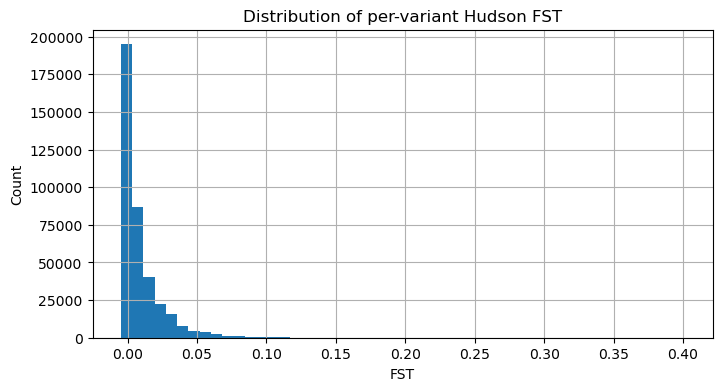

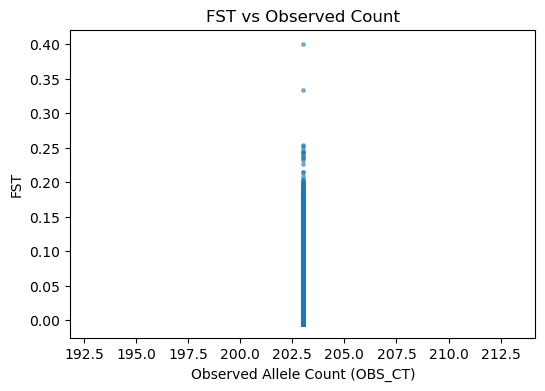


Top 1000 variants:
        #CHROM        POS                    ID  OBS_CT  HUDSON_FST
246701      11   61548559   11:61548559[b37]A,G     203    0.400949
301811      14  106078720  14:106078720[b37]G,A     203    0.333348
82600        3  147350767   3:147350767[b37]C,G     203    0.253599
74641        3   69484238    3:69484238[b37]A,C     203    0.252684
74           1     569204      1:569204[b37]T,C     203    0.247885
Loading FST file: 1000genomes/output/EAS_FST_RESULTS.CHB.JPT.fst.var
   #CHROM    POS               ID  OBS_CT  HUDSON_FST
0       1  13116  1:13116[b37]T,G     207    0.059574
1       1  14464  1:14464[b37]A,T     207         NaN
2       1  14599  1:14599[b37]T,A     207    0.048153
3       1  14933  1:14933[b37]G,A     207   -0.004193
4       1  15774  1:15774[b37]G,A     207    0.034513
              #CHROM           POS    OBS_CT     HUDSON_FST
count  390520.000000  3.905200e+05  390520.0  380575.000000
mean        9.114317  7.778476e+07     207.0       0.004156

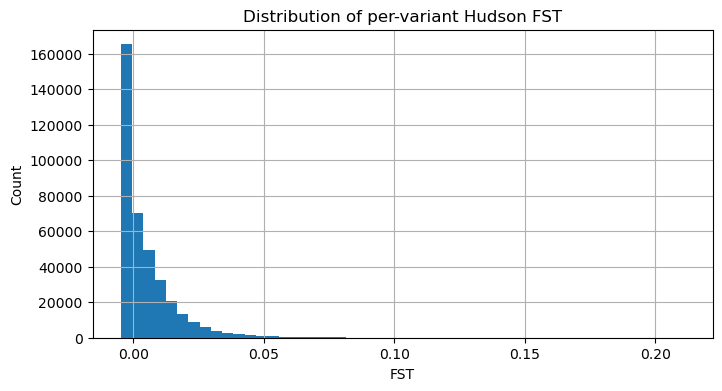

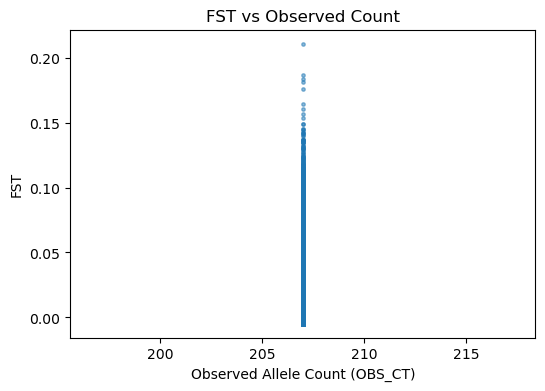


Top 1000 variants:
        #CHROM       POS                   ID  OBS_CT  HUDSON_FST
383131      21  47054067  21:47054067[b37]A,G     207    0.211079
246680      11  61375236  11:61375236[b37]T,G     207    0.187115
332365      17  12920146  17:12920146[b37]A,C     207    0.183898
142454       6  29916885   6:29916885[b37]T,C     207    0.181395
232481      10  94746240  10:94746240[b37]G,A     207    0.176092
Loading FST file: 1000genomes/output/EAS_FST_RESULTS.CHB.KHV.fst.var
   #CHROM    POS               ID  OBS_CT  HUDSON_FST
0       1  13116  1:13116[b37]T,G     202    0.000338
1       1  14464  1:14464[b37]A,T     202    0.010152
2       1  14599  1:14599[b37]T,A     202   -0.001512
3       1  14933  1:14933[b37]G,A     202    0.003869
4       1  15774  1:15774[b37]G,A     202   -0.002065
              #CHROM           POS    OBS_CT     HUDSON_FST
count  390520.000000  3.905200e+05  390520.0  377534.000000
mean        9.114317  7.778476e+07     202.0       0.003677
std        

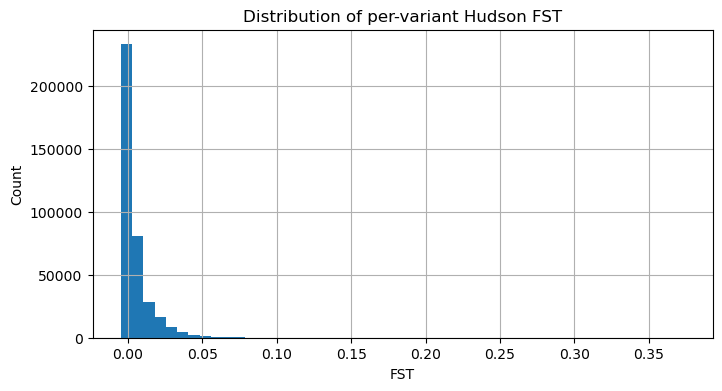

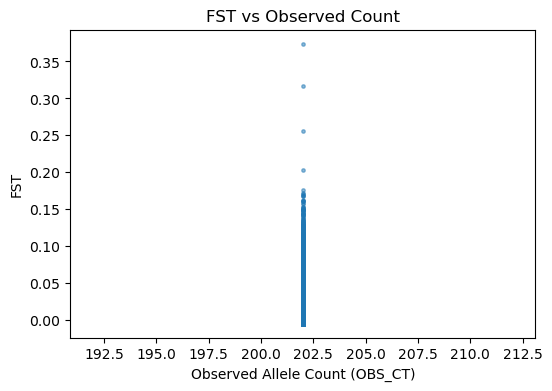


Top 1000 variants:
        #CHROM        POS                   ID  OBS_CT  HUDSON_FST
246701      11   61548559  11:61548559[b37]A,G     202    0.373993
77202        3  100365528  3:100365528[b37]G,C     202    0.317073
336131      17   40956277  17:40956277[b37]C,A     202    0.255220
324902      16   67913222  16:67913222[b37]T,G     202    0.203285
222037      10   12204213  10:12204213[b37]T,G     202    0.175600


In [6]:
jpt_khv_df, jpt_khv_top = analyze_fst(JPT_KHV_FST_FILE)
chb_jpt_df, chb_jpt_top = analyze_fst(CHB_JPT_FST_FILE)
chb_khv_df, chb_khv_top = analyze_fst(CHB_KHV_FST_FILE)

In [8]:
# merge top variants from all three comparisons by ID
from typing import List

def merge_top_variants(*dfs, id_cols=("ID")):
    """
    Merge multiple FST top-variant DataFrames and keep unique variants by ID.

    Parameters
    ----------
    dfs : list of DataFrames
        DataFrames to merge (each containing top variants).
    id_cols : tuple
        Columns that define a unique variant (default: CHROM + POS).

    Returns
    -------
    merged_unique : DataFrame
        Unique merged variants.
    """
    # Concatenate all top lists
    merged = pd.concat(dfs, ignore_index=True)

    # Drop duplicates based on variant ID columns
    merged_unique = merged.drop_duplicates(subset=id_cols)

    return merged_unique

In [26]:
import csv
merged_df = merge_top_variants(jpt_khv_top, chb_jpt_top, chb_khv_top) 

print("Merged top FST variants head:")
print(merged_df.head())
print("Merged top FST variants shape:")
print(merged_df.shape)
merged_df = merged_df["ID"].to_frame()
# rename id to #IID
merged_df = merged_df.rename(columns={"ID": "#IID"})
with open("1000genomes/output/top_snps.txt", "w") as f:
    for snp_id in merged_df["#IID"]:
        f.write(f"{snp_id}\n")

Merged top FST variants head:
   #CHROM        POS                    ID  OBS_CT  HUDSON_FST
0      11   61548559   11:61548559[b37]A,G     203    0.400949
1      14  106078720  14:106078720[b37]G,A     203    0.333348
2       3  147350767   3:147350767[b37]C,G     203    0.253599
3       3   69484238    3:69484238[b37]A,C     203    0.252684
4       1     569204      1:569204[b37]T,C     203    0.247885
Merged top FST variants shape:
(2637, 5)


In [27]:
!plink2 --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids \
      --extract 1000genomes/output/top_snps.txt \
      --make-pgen \
      --out 1000genomes/output/FST_FILTERED

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/FST_FILTERED.log.
Options in effect:
  --extract 1000genomes/output/top_snps.txt
  --make-pgen
  --out 1000genomes/output/FST_FILTERED
  --pfile 1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids

Start time: Thu Jan  8 13:11:40 2026
15686 MiB RAM detected, ~7095 available; reserving 7031 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.psam.
17884473 variants loaded from
1000genomes/output/EAS_SNP_MAF_HWE_filtered_unique_ids.pvar.
Note: No phenotype data present.
--extract: 2637 variants remaining.
2637 variants remaining after main filters.
Writing 1000genomes/output/FST_FILTERED.psam ... done.
Writing 1000genomes/output/FST_FILTERED.pvar ... 10101111121213131414

In [28]:
!plink2 \
  --pfile 1000genomes/output/FST_FILTERED \
  --pca 10 \
  --out 1000genomes/output/FST_PCA


PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000genomes/output/FST_PCA.log.
Options in effect:
  --out 1000genomes/output/FST_PCA
  --pca 10
  --pfile 1000genomes/output/FST_FILTERED

Start time: Thu Jan  8 13:12:51 2026
15686 MiB RAM detected, ~7334 available; reserving 7270 MiB for main workspace.
Using up to 8 compute threads.
306 samples (0 females, 0 males, 306 ambiguous; 306 founders) loaded from
1000genomes/output/FST_FILTERED.psam.
2637 variants loaded from 1000genomes/output/FST_FILTERED.pvar.
Note: No phenotype data present.
Calculating allele frequencies... done.
Constructing GRM: 1016212732384349546065707681879298done.
Extracting eigenvalues and eigenvectors... done.
--pca: Eigenvectors written to 1000genomes/output/FST_PCA.eigenvec , and
eigenvalues written to 1000genomes/output/FST_PCA.eigenval .
End time: Thu Jan  8 13:12:51 2026


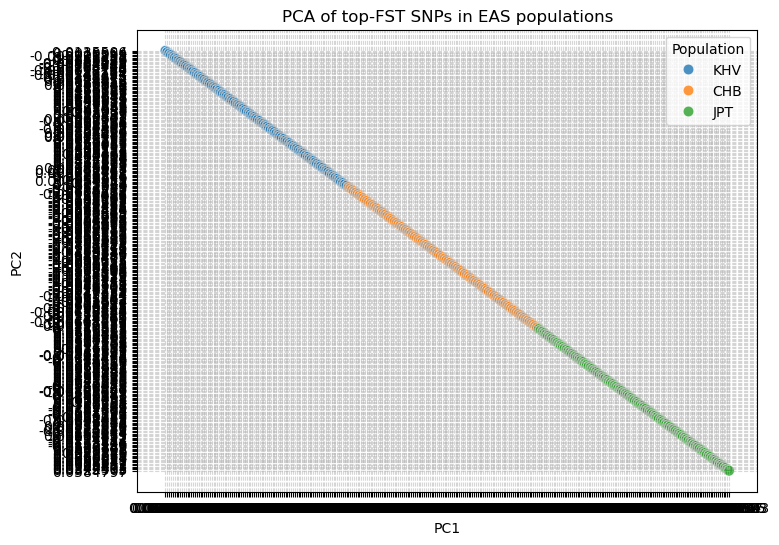

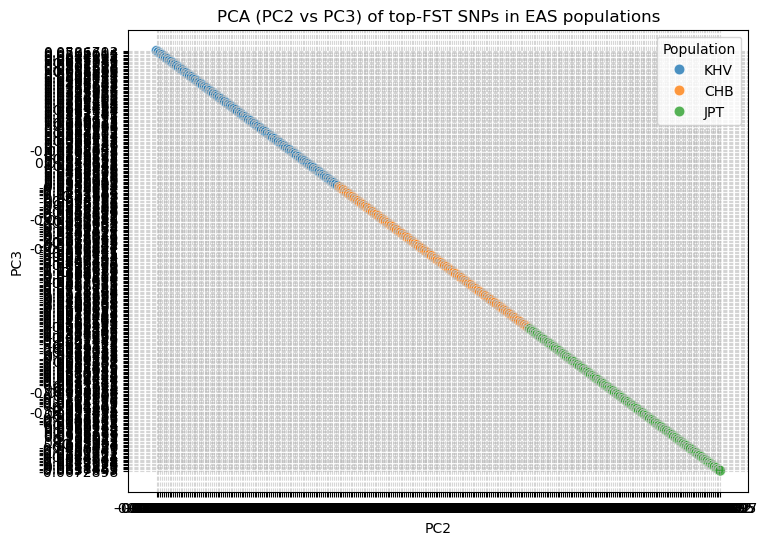

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pca_file = "1000genomes/output/FST_PCA.eigenvec"
evec = pd.read_csv(pca_file, sep="\s+", header=None)
evec.columns = ["#IID"] + [f"PC{i}" for i in range(1,11)]
# --- Load population metadata (no header) ---
pop_file = "1000genomes/EAS_subpopulation_samples.csv"
pop_df = pd.read_csv(pop_file, header=None)
pop_df.columns = ["#IID", "POP","SUPER_POP"]
pop_df = pop_df[["#IID", "POP"]]
# Merge PCA and population info
merged = evec.merge(pop_df, on="#IID")

# --- Plot PC1 vs PC2 ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x="PC1",
    y="PC2",
    hue="POP",
    palette="tab10",
    s=60,
    alpha=0.8
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of top-FST SNPs in EAS populations")
plt.legend(title="Population")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Optional: Plot PC2 vs PC3 ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x="PC2",
    y="PC3",
    hue="POP",
    palette="tab10",
    s=60,
    alpha=0.8
)
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("PCA (PC2 vs PC3) of top-FST SNPs in EAS populations")
plt.legend(title="Population")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

   eigenvalue
0    21.54890
1     9.06874
2     7.34131
3     3.77582
4     3.39929
5     1.99152
6     1.74740
7     1.69556
8     1.65222
9     1.64124


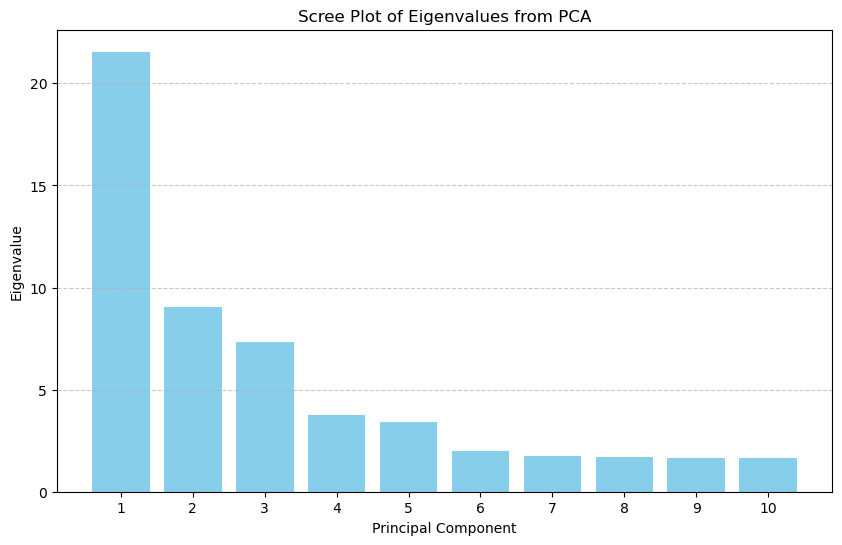

In [38]:
# graph 10 PCAs

import pandas as pd
pca_file = "1000genomes/output/FST_PCA.eigenval"
eval = pd.read_csv(pca_file, sep="\s+", header=None)
eval.columns = ["eigenvalue"]
print(eval)
# plot bar graph of eigenvalues
plt.figure(figsize=(10,6))
plt.bar(range(1, len(eval) + 1), eval["eigenvalue"], color='skyblue')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot of Eigenvalues from PCA")
plt.xticks(range(1, len(eval) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
def variant_to_bed(variant: str) -> Tuple[str, int, int, str]:
    """
    Convert a variant string like '12:58124534[b37]C,G' to BED format.

    Returns a tuple: (chrom, start, end, name)
    """
    try:
        chrom_pos, allele_info = variant.split("]")
        chrom_pos = chrom_pos.replace("[b37", "")
        chrom, pos_str = chrom_pos.split(":")
        pos = int(pos_str)
        start = pos - 1  # BED is 0-based start
        end = pos  # BED end is 1-based
        name = allele_info  # e.g., "C,G"
        return (chrom, start, end, name)
    except Exception as e:
        raise ValueError(f"Failed to parse variant '{variant}': {e}")

snp_file = "1000genomes/output/top_snps.txt"
bed_file = "1000genomes/output/top_snps.bed"
with open(snp_file, "r") as sf, open(bed_file, "w", newline='') as bf:
    bed_writer = csv.writer(bf, delimiter='\t')
    for line in sf:
        variant = line.strip()
        chrom, start, end, name = variant_to_bed(variant)
        bed_writer.writerow([chrom, start, end, name])


In [46]:
!bcftools view -S 1000genomes/EAS_subpopulation_samples_list.csv -R 1000genomes/output/top_snps.bed -Oz -o  1000genomes/vcf/filtered.vcf.gz 1000genomes/main_vcf/ALL_merged.vcf.gz

In [49]:
!bcftools query -f '%CHROM\t%POS\t%REF\t%ALT[\t%GT]\n' 1000genomes/vcf/filtered.vcf.gz | head



11	365918	A	G	1|1	0|0	0|0	0|0	1|1	1|0	0|1	1|1	1|0	1|1	0|0	1|0	1|1	0|1	0|1	0|1	0|1	0|0	0|0	0|0	0|0	1|1	0|1	0|1	0|1	0|1	0|0	0|1	0|1	0|0	0|0	0|0	0|1	0|0	0|1	0|0	0|1	0|0	1|0	0|1	0|0	1|0	0|1	1|0	0|1	0|0	1|1	0|0	1|1	0|0	1|1	1|0	1|0	0|1	0|0	0|0	0|1	1|1	0|0	1|0	0|0	1|1	1|0	1|1	0|0	0|1	0|0	0|1	1|0	1|1	0|1	0|1	0|1	0|1	1|0	0|1	1|0	0|0	0|0	1|0	0|0	1|0	0|0	1|1	1|0	1|0	0|0	0|1	1|1	0|1	1|1	0|0	0|0	1|1	0|1	1|0	0|1	0|1	1|1	1|1	1|0	0|1	0|1	0|0	1|1	0|0	0|1	0|0	1|0	1|0	0|0	0|1	0|0	1|0	0|1	1|0	0|1	0|1	0|0	0|1	1|1	0|0	0|1	0|1	0|0	0|1	0|1	0|0	0|0	1|1	1|1	0|1	1|1	0|1	0|1	1|0	0|0	0|1	1|0	0|1	1|0	1|1	1|0	0|0	0|0	0|0	0|0	1|0	0|1	1|1	1|1	0|0	0|1	0|1	0|0	1|1	1|0	0|0	1|1	1|0	0|0	1|0	0|1	0|0	1|0	0|0	0|0	0|0	0|0	1|0	0|1	1|1	1|1	0|0	0|1	1|1	1|0	0|1	1|0	1|0	1|1	0|0	0|1	1|0	0|0	0|0	0|1	1|0	0|1	1|0	0|1	0|0	0|1	0|0	0|1	1|1	1|0	1|1	0|0	1|1	1|1	1|0	1|1	0|0	1|1	1|0	1|0	1|1	0|0	1|0	0|0	1|0	0|1	1|1	1|1	1|0	1|1	0|1	0|1	0|0	1|0	1|0	1|1	1|0	0|0	0|1	0|1	1|1	1|1	0|1	0|1	0|1	1|1	0|1	0|0	0|1	1|0	1|1	0|1	0|1	1|0	1|1	0|0	1|1	0|1	0|1	1|

In [54]:
!bcftools view -i 'ALT ~ "^[ATGC]$"' 1000genomes/vcf/filtered.vcf.gz > 1000genomes/vcf/filtered_snps_only.vcf
!bcftools view -i 'REF ~ "^[ATGC]$"' 1000genomes/vcf/filtered_snps_only.vcf > 1000genomes/vcf/filtered_snps_only_final.vcf


pass=1 [G]
pass=1 [G]
pass=0 [<CN2>]
pass=0 [<CN2>]
pass=0 [<CN0>,<CN2>]
pass=1 [T]
pass=1 [G]
pass=1 [G]
pass=1 [G]
pass=1 [A]
pass=0 [<CN0>,<CN2>]
pass=1 [T]
pass=1 [A]
pass=0 [<CN0>]
pass=0 [<CN0>,<CN2>]
pass=1 [C]
pass=0 [<CN2>]
pass=0 [<CN2>]
pass=1 [T]
pass=1 [C]
pass=1 [T]
pass=1 [A]
pass=1 [A]
pass=1 [C]
pass=1 [C]
pass=1 [G]
pass=1 [G]
pass=1 [T]
pass=0 [<CN2>]
pass=0 [<CN2>]
pass=1 [A]
pass=0 [<CN2>]
pass=0 [<CN2>]
pass=1 [T]
pass=1 [T]
pass=1 [T]
pass=1 [C]
pass=1 [T]
pass=1 [C]
pass=1 [C]
pass=1 [G]
pass=1 [T]
pass=1 [A]
pass=0 [<CN2>]
pass=0 [<CN2>]
pass=1 [A]
pass=0 [<CN0>,<CN2>]
pass=0 [<CN2>]
pass=1 [G]
pass=1 [G]
pass=0 [<CN0>]
pass=1 [T]
pass=0 [<CN0>]
pass=0 [<CN0>]
pass=1 [C]
pass=1 [C]
pass=0 [<INS:ME:LINE1>]
pass=1 [G]
pass=1 [A]
pass=1 [T]
pass=1 [C]
pass=1 [T]
pass=1 [A]
pass=1 [C]
pass=1 [A]
pass=1 [C]
pass=1 [A]
pass=1 [A]
pass=1 [C]
pass=1 [C]
pass=1 [A]
pass=1 [G]
pass=0 [<CN0>]
pass=1 [C]
pass=0 [<CN2>]
pass=1 [G]
pass=1 [A]
pass=1 [A]
pass=1 [A]
pass=1 [C]

In [ ]:
!bcftools view -h 1000genomes/vcf/filtered_snps_only_final.vcf 

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	HG01595	HG01596	HG01597	HG01598	HG01599	HG01600	HG01840	HG01841	HG01842	HG01843	HG01844	HG01845	HG01846	HG01847	HG01848	HG01849	HG01850	HG01851	HG01852	HG01853	HG01855	HG01857	HG01858	HG01859	HG01860	HG01861	HG01862	HG01863	HG01864	HG01865	HG01866	HG01867	HG01868	HG01869	HG01870	HG01871	HG01872	HG01873	HG01874	HG01878	HG02016	HG02017	HG02019	HG02020	HG02023	HG02025	HG02026	HG02028	HG02029	HG02031	HG02032	HG02035	HG02040	HG02047	HG02048	HG02049	HG02050	HG02057	HG02058	HG02060	HG02061	HG02064	HG02067	HG02069	HG02070	HG02072	HG02073	HG02075	HG02076	HG02078	HG02079	HG02081	HG02082	HG02084	HG02085	HG02086	HG02087	HG02088	HG02113	HG02116	HG02121	HG02122	HG02127	HG02128	HG02130	HG02131	HG02133	HG02134	HG02136	HG02137	HG02138	HG02139	HG02140	HG02141	HG02142	HG02512	HG02513	HG02521	HG02522	NA18525	NA18526	NA18528	NA18530	NA18531	NA18532	NA18533	NA18534	NA18535	NA18536	NA18537	NA18538	NA18539	NA18541	NA18542	NA18543	NA18544	NA18545	NA18546	NA18547	NA

In [64]:
# keep everything except lines starting with ##
!grep -v '^##' 1000genomes/vcf/filtered_snps_only_final.vcf > 1000genomes/vcf/snps_only_clean.vcf


In [66]:
import pandas as pd

vcf_file = "1000genomes/vcf/snps_only_clean.vcf"

# Read VCF, skip meta lines starting with ##
with open(vcf_file) as f:
    for line in f:
        if line.startswith("#CHROM"):
            header = line.strip().split("\t")
            break

# Load the rest into a DataFrame
df = pd.read_csv(
    vcf_file,
    comment="#",
    sep="\t",
    names=header,
    dtype=str
)

# Create a new column for 'pop. id' = chrom:pos
df['pop_id'] = df['#CHROM'] + ":" + df['POS']

# Keep only columns of interest (pop_id + samples)
sample_cols = header[9:]  # samples start from 10th column
df_samples = df[['pop_id'] + sample_cols]

# Function to convert genotype string to numeric
def gt_to_num(gt: str) -> int:
    if gt in {"0|0", "0/0"}:
        return 0
    elif gt in {"0|1", "1|0", "0/1", "1/0"}:
        return 1
    elif gt in {"1|1", "1/1"}:
        return 2
    else:
        return pd.NA  # handle missing or weird genotypes

# Apply conversion to all sample columns
for col in sample_cols:
    df_samples[col] = df_samples[col].apply(lambda x: gt_to_num(str(x).split(":")[0]))

# Transpose so samples are rows
df_final = df_samples.set_index('pop_id').T.reset_index()
df_final = df_final.rename(columns={'index': 'sample'})

# Save to CSV
df_final.to_csv("1000genomes/vcf/vcf_numeric_transposed.csv", index=False)

print(df_final.head())


/tmp/ipykernel_5563/1180974673.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samples[col] = df_samples[col].apply(lambda x: gt_to_num(str(x).split(":")[0]))


pop_id   sample  11:365918  11:459069  11:997733  11:1868169  11:2042945  \
0       HG01595          2          0          1           1           1   
1       HG01596          0          0          2           1           1   
2       HG01597          0          0          2           1           1   
3       HG01598          0          0          0           1           2   
4       HG01599          2          0          0           1           1   

pop_id  11:2161858  11:2922493  11:3478102  11:4795309  ...  22:48219937  \
0                2           1           2           1  ...            0   
1                2           0           1           1  ...            2   
2                2           0           1           0  ...            1   
3                0           0           1           0  ...            2   
4                2           0           1           0  ...            0   

pop_id  22:48682640  22:48695750  22:48960409  22:48991754  22:49000732  \
0          

In [69]:
# merge with population info
import pandas as pd
population_file = "1000genomes/EAS_subpopulation_samples.csv"
population_df = pd.read_csv(population_file, header=None)
population_df.columns = ["sample", "pop", "super_pop"]
numeric_df = pd.read_csv("1000genomes/vcf/vcf_numeric_transposed.csv")
df_final = pd.merge(numeric_df, population_df, on="sample", how="left")
df_final = df_final.drop(columns=["super_pop"])
print(df_final.head())
df_final.to_csv("1000genomes/vcf/vcf_numeric_transposed_with_population.csv", index=False)

    sample  11:365918  11:459069  11:997733  11:1868169  11:2042945  \
0  HG01595          2          0          1           1           1   
1  HG01596          0          0          2           1           1   
2  HG01597          0          0          2           1           1   
3  HG01598          0          0          0           1           2   
4  HG01599          2          0          0           1           1   

   11:2161858  11:2922493  11:3478102  11:4795309  ...  22:48682640  \
0           2           1           2           1  ...            0   
1           2           0           1           1  ...            1   
2           2           0           1           0  ...            0   
3           0           0           1           0  ...            1   
4           2           0           1           0  ...            1   

   22:48695750  22:48960409  22:48991754  22:49000732  22:49062501  \
0            1            1            2            0            2   
1     

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load CSV
df = pd.read_csv("1000genomes/vcf/vcf_numeric_transposed_with_population.csv")

# Suppose you have a population column
# df['population'] = ...  # merge/populate it from metadata

X = df.drop(columns=["sample", "pop"])
y = df["pop"]
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,stratify=y, random_state=42
)


# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



Features shape: (306, 2637), Labels shape: (306,)
              precision    recall  f1-score   support

         CHB       1.00      1.00      1.00        21
         JPT       1.00      1.00      1.00        21
         KHV       1.00      1.00      1.00        20

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [81]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_encoded = lb.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify= y_encoded,test_size=0.2, random_state=42
)
clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1,
)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))



/home/Plutonium/miniforge3/envs/GeneAnalysisET4596E/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [14:34:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764148544963/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.83      0.90      0.86        21
           2       0.95      1.00      0.98        20

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



/home/Plutonium/miniforge3/envs/GeneAnalysisET4596E/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [82]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", max_iter=1000, n_jobs=-1
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/home/Plutonium/miniforge3/envs/GeneAnalysisET4596E/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# X: SNP numeric matrix, y: labels
rf = RandomForestClassifier(n_estimators=500, random_state=42)

rf.fit(X,y)
y_pred = rf.predict(X_test)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(25).index

NameError: name 'X' is not defined

In [119]:
X_top = X[top_features]

rf_top = RandomForestClassifier(n_estimators=500, random_state=42)
rf_top.fit(X_top, y)

y_pred = rf_top.predict(X_top)

print(classification_report(y, y_pred))
print("top_features:", top_features)


              precision    recall  f1-score   support

         CHB       0.96      0.97      0.97       103
         JPT       0.97      0.95      0.96       104
         KHV       0.98      0.99      0.98        99

    accuracy                           0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306

top_features: Index(['11:61548559', '3:100365528', '17:40956277', '9:133578385',
       '4:101002868', '1:22315762', '14:96938945', '1:569204', '13:42734178',
       '16:67913222', '17:12920146', '4:17813761', '1:12387655', '8:102130291',
       '3:172774448', '17:725743', '8:139071833', '2:31567657', '5:120686518',
       '9:98231346', '5:41181491', '18:18518431', '1:80875078', '1:97189019',
       '5:68662421'],
      dtype='object')
